In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Product_performance.xlsx to Product_performance.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_excel('Product_performance.xlsx')
data.tail(10)

,Cloth_type_color,visitors,sessions,duration,total_bounce_rate,total_carts,total_checkouts,total_conversion,total_orders_placed,total_pageviews
1229,Jacket-purple,22,27,3m5s,0.55555,0,0,0.00000,0,111
1230,polo-green,112,119,47.512605042s,0.61344,8,1,0.00000,0,297
1231,Sweatshirt-yellow,178,203,1m28.620689655s,0.59113,5,7,0.00000,0,526
1232,t-shirt-peach,93,121,2m23.280991735s,0.57024,1,1,0.00000,0,292
1233,polo-purple,105,118,2m15.364406779s,0.50847,2,4,0.01694,2,453
1234,Trouser-blue,30,39,4m10.256410256s,0.61538,3,2,0.00000,0,249
1235,polo-purple,26,47,31.574468085s,0.82978,1,0,0.00000,0,82
1236,Trouser-navy,21,27,3m27s,0.66666,3,0,0.00000,0,77
1237,t-shirt-white,20,22,1m28.727272727s,0.63636,1,0,0.00000,0,45
1238,t-shirt-pink,4,4,2m48.75s,0.50000,0,0,0.00000,0,42


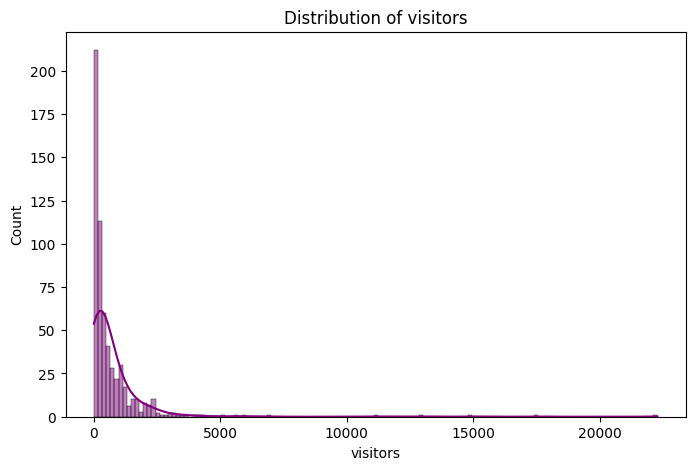

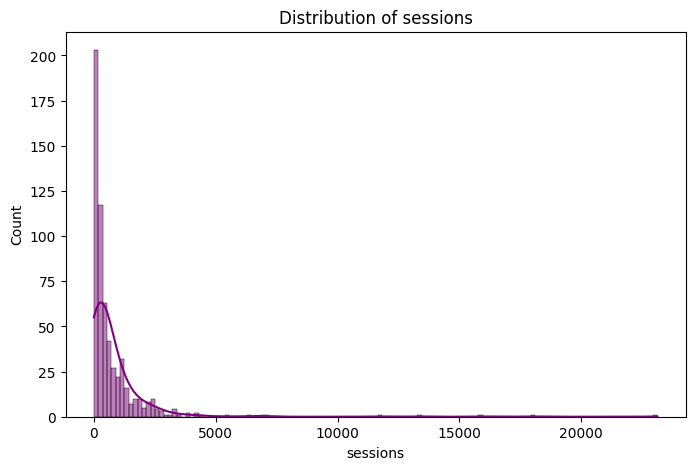

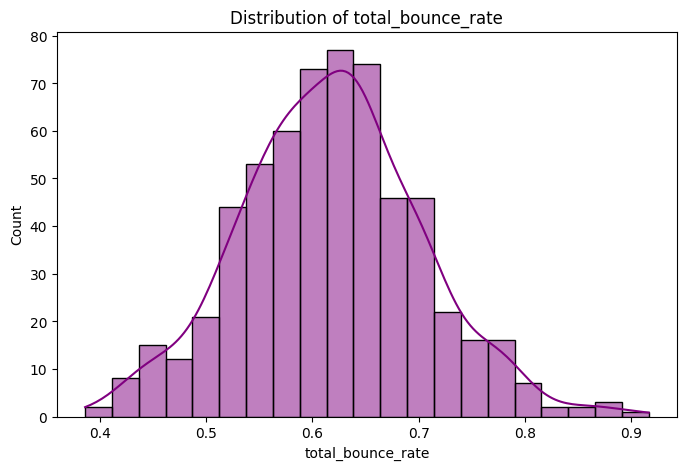

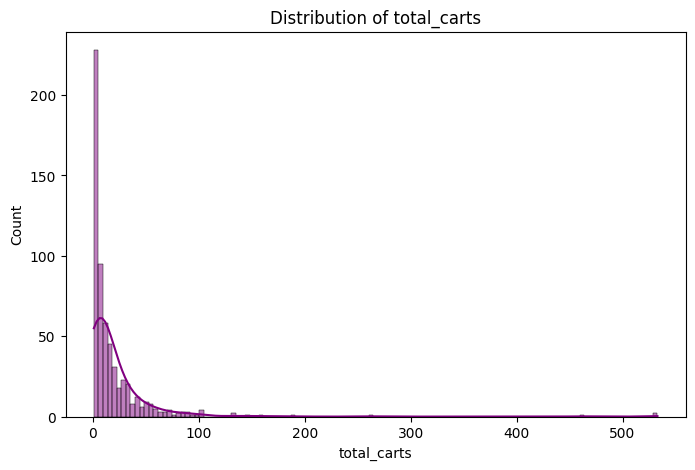

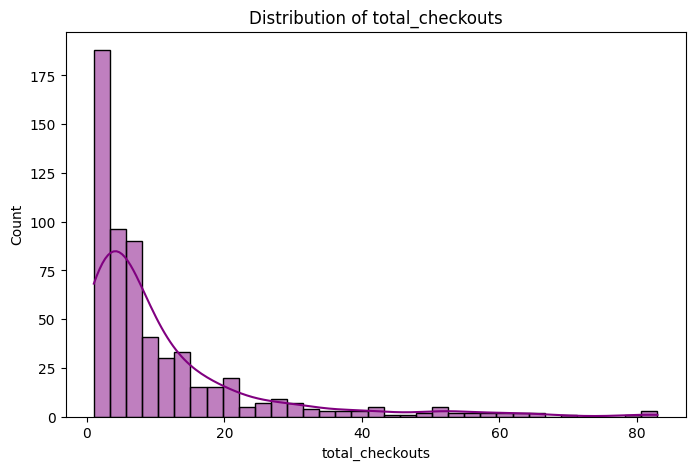

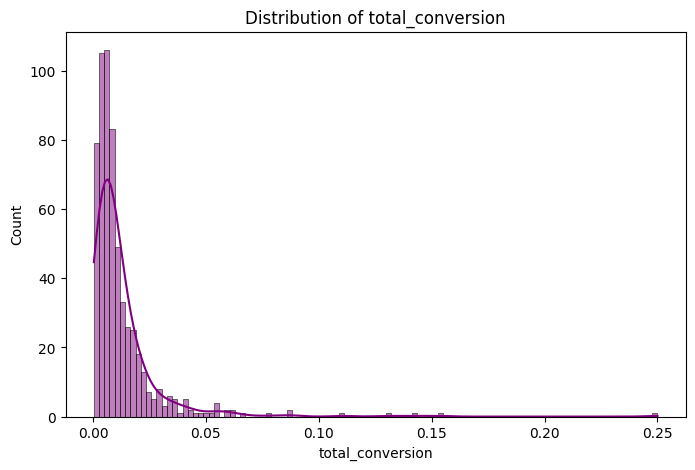

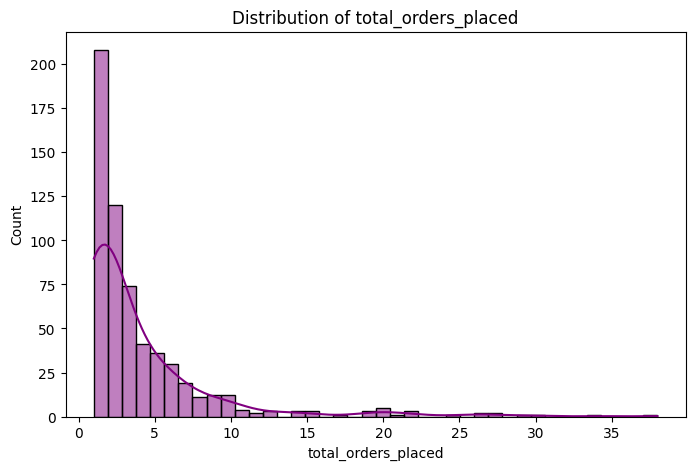

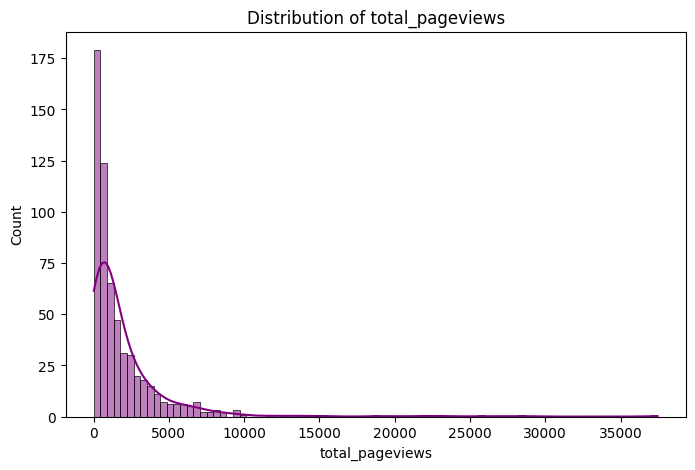

In [ ]:
data_sem_zeros = data.replace(0, np.nan).dropna()
numerical_columns = data_sem_zeros.select_dtypes(include=['int64', 'float64']).columns

purple_color = '#800080'

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data_sem_zeros, x=col, kde=True, color=purple_color)
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Histogramas

1.
# Distribuição de Visitantes

# O eixo X representa o número de visitantes.
# O eixo Y representa a contagem de ocorrências dessa quantidade de visitantes.
# A forma do gráfico sugere uma distribuição altamente inclinada à direita, o que significa que há muitos dias com poucos visitantes
# e poucos dias com um número muito alto de visitantes.

2.
# Distribuição de Sessões

# O eixo X representa o número de sessões.
# O eixo Y representa a contagem de ocorrências dessa quantidade de sessões.
# Assim como o gráfico de visitantes, este gráfico também é inclinado à direita, indicando uma predominância de dias com
#  poucas sessões e poucos dias com muitas sessões.

3.
#Distribuição da taxa de rejeição (bounce_rate)

# O eixo X representa a taxa de rejeição total, que é a porcentagem de todas as sessões em que o usuário saiu do site a partir da página de entrada
# sem interagir com a página.
# O eixo Y mostra a contagem de frequência de diferentes taxas de rejeição.
# Este gráfico mostra um pico em torno de uma taxa de rejeição específica, indicando que há uma taxa comum que ocorre com mais frequência.
#  Uma distribuição mais ampla ou múltiplos picos poderiam indicar variações na experiência do usuário ou na qualidade da página de destino.

4.
# Distribuição do Total de Carrinhos

# O eixo X mostra o número total de carrinhos de compras.
# O eixo Y mostra quantas vezes diferentes totais de carrinhos de compras ocorreram.
# Este gráfico também é fortemente inclinado para a direita, indicando que um número maior de carrinhos é menos frequente.
#  A maioria dos dados se concentra em torno de um número menor de carrinhos.

5.
# Distribuição do Total de Checkouts

# O eixo X mostra o número total de checkouts iniciados.
# O eixo Y mostra a frequência de ocorrências para cada número total de checkouts.
# O gráfico é fortemente inclinado para a direita, o que indica que há muitas instâncias de poucos checkouts e poucas instâncias de um grande número de checkouts.

6.
# Distribuição do Total de Conversões

# O eixo X mostra o número total de conversões, que é o número de checkouts que resultaram em vendas efetivas.
# O eixo Y mostra a frequência de ocorrências para cada número total de conversões.
# Este gráfico também mostra um declínio acentuado, sugerindo que altos números de conversões são raros.

+++

# ESTATÍSTICA DESCRITIVA

## BOX PLOT

In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    fig = px.box(data, y=col, title=f'Boxplot of {col}')
    fig.show()
data_sem_zeros = data.replace(0, np.nan).dropna()
numerical_columns = data_sem_zeros.select_dtypes(include=['int64', 'float64']).columns

purple_color = '#800080'

for col in numerical_columns:
    fig = px.box(data_sem_zeros, y=col, title=f'Boxplot of {col}', points="all")
    fig.update_traces(marker_color=purple_color)
    fig.show()

In [ ]:
1.
# Boxplot de Visitantes:

# resume a distribuição do número de visitantes em um período de tempo específico.
# A linha central da caixa representa a mediana do número de visitantes.
# As bordas da caixa indicam o primeiro e terceiro quartis, mostrando onde estão concentrados 50% dos dados.
# As linhas horizontais (whiskers) estendem-se até os valores mínimo e máximo que não são considerados outliers.
# Pontos fora dos whiskers podem indicar dias atípicos com número excepcionalmente alto ou baixo de visitantes.

2.
# Boxplot de Sessões:

# Este gráfico resume a distribuição do número de sessões no site.
# A mediana, quartis e valores extremos são apresentados da mesma forma que no boxplot de visitantes.
# Sessões são contabilizadas cada vez que um usuário inicia uma nova visita ao site, portanto, este número pode ser maior
#  que o número de visitantes se os usuários visitarem o site várias vezes.

3.
# Boxplot da Taxa de Rejeição Total (Bounce Rate):

# Este gráfico mostra a distribuição da taxa de rejeição do site, que é a porcentagem de visitantes que entram no site e saem sem realizar nenhuma ação,
#  como clicar em um link ou realizar uma compra.
# A linha dentro da caixa representa a mediana da taxa de rejeição.
# A caixa em si mostra o intervalo interquartílico (IQR), que é a faixa entre o primeiro quartil (25%) e o terceiro quartil (75%).
# As linhas que se estendem para fora da caixa, conhecidas como whiskers, mostram a variação fora do IQR. Pontos fora dos whiskers podem ser considerados outliers.

4.
# Boxplot do Total de Carrinhos

# Este gráfico mostra a distribuição do número total de carrinhos de compra criados, o que pode ser um indicador de intenção de compra.
# A linha dentro da caixa representa a mediana do número de carrinhos.
# A caixa indica o IQR da distribuição do número de carrinhos.
# Os whiskers se estendem para mostrar a variabilidade além do IQR, e pontos fora dos whiskers indicam outliers.

5.
# Boxplot do Total de Checkouts

# O eixo Y mostra o número de checkouts.
# A caixa indica a distribuição intermediária de dados com a linha do meio representando a mediana.
# As extremidades da caixa indicam o primeiro e terceiro quartis.
# As linhas verticais ou "whiskers" estendem-se até os pontos de dados que não são considerados outliers, mostrando o alcance típico dos dados.
# Pontos fora dos whiskers representariam dias atípicos com números excepcionalmente altos ou baixos de checkouts.


6.
# Boxplot do Total de Pedidos Realizados

# O eixo Y representa o número total de pedidos realizados.
# A caixa central mostra a mediana e os quartis, ou seja, a linha central da caixa é a mediana, e as bordas representam o primeiro e terceiro quartis.
# Os "whiskers" representam a variação fora dos quartis, estendendo-se até o valor máximo e mínimo que não são considerados outliers.
# Pontos fora dos whiskers, caso existam, são considerados outliers e representam dados que são excepcionalmente altos ou baixos.

7.
# Boxplot do Total de Visualizações de Página:

# O eixo Y representa o número total de visualizações de página.
# A caixa e os whiskers são interpretados da mesma maneira que no boxplot de pedidos realizados, mostrando a distribuição de 50% dos dados e a
# variação total excluindo outliers.


## HISTOGRAMA


In [ ]:
data_sem_zeros = data.replace(0, np.nan).dropna()
numerical_columns = data_sem_zeros.select_dtypes(include=['int64', 'float64']).columns

purple_color = '#800080'

for col in numerical_columns:
    fig = px.histogram(data_sem_zeros, x=col, title=f'Histogram of {col}', color_discrete_sequence=[purple_color])
    fig.show()

In [ ]:
1.
# Histograma de Visitantes:

# O eixo X mostra o número de visitantes, distribuídos em faixas (por exemplo, 0, 1k, 2k, etc.).
# O eixo Y representa a contagem (número de ocorrências) de visitantes em cada faixa.
# Este gráfico mostra quantas vezes um determinado número de visitantes foi atingido, permitindo identificar
# as faixas mais comuns de visitação.

2.
# Histograma de Duração

# O eixo X mostra a duração das sessões em um site, provavelmente em segundos ou minutos.
# O eixo Y mostra a contagem de sessões que caíram em cada faixa de duração.
# O histograma fornece uma visão geral de quanto tempo os visitantes estão gastando no site.

In [ ]:
data_filtered = data[data['duration'] > 0]

# Create a histogram for the 'duration_on_site' column
histogram = px.histogram(
    data_filtered,
    x='duration',
    title='Histogram of Duration on Site',
    color_discrete_sequence=['#800080']
)

# Display the histogram
histogram.show()

In [ ]:
1.
# O eixo X indica a duração das sessões no site, provavelmente medido em segundos ou minutos.
# O eixo Y mostra a contagem de sessões para cada faixa de duração.
# Com base na forma do gráfico, parece que a maioria das sessões tem uma duração curta, com a frequência diminuindo à medida que a duração aumenta.
# Isso sugere que muitos usuários passam pouco tempo no site.

## SCATTER PLOT

In [ ]:
data_sem_zeros = data.replace(0, np.nan).dropna()
numerical_columns = data_sem_zeros.select_dtypes(include=['int64', 'float64']).columns

purple_color = '#800080'

scatter_plots = []

for col in numerical_columns:
    if col in ['total_pageviews', 'total_orders_placed']:
        scatter = px.scatter(data_sem_zeros, x='total_pageviews', y='total_orders_placed', title='Scatter plot', color_discrete_sequence=[purple_color])
        scatter_plots.append(scatter)

for scatter in scatter_plots:
    scatter.show()

In [ ]:
1.
# Scatter Plot 1:

# O eixo X representa o total de visualizações de páginas.
# O eixo Y representa o total de pedidos realizados.
# Cada ponto no gráfico representa uma observação individual, onde a posição no eixo X indica o número de visualizações de páginas e
#  a posição no eixo Y indica o número de pedidos realizados.

2.
# Scatter Plot 2:

# Semelhante ao gráfico superior, também mostra a relação entre visualizações de páginas (eixo X) e pedidos realizados (eixo Y).
# Este gráfico pode representar um conjunto de dados diferente ou outro período de tempo comparado ao primeiro.


           visitors      sessions  total_bounce_rate  total_carts  \
count   1239.000000   1239.000000        1239.000000  1239.000000   
mean     417.841001    458.491525           0.632348    11.570621   
std     1208.149994   1272.346764           0.140118    32.806004   
min        1.000000      1.000000           0.000000     0.000000   
25%       24.000000     29.000000           0.566660     0.000000   
50%      103.000000    119.000000           0.633460     3.000000   
75%      361.500000    395.500000           0.708180    10.000000   
max    22273.000000  23125.000000           1.000000   533.000000   

       total_checkouts  total_conversion  total_orders_placed  total_pageviews  
count      1239.000000       1239.000000          1239.000000      1239.000000  
mean          5.657789          0.009149             1.934625      1078.363196  
std          10.772088          0.044672             3.895205      2431.732312  
min           0.000000          0.000000             0

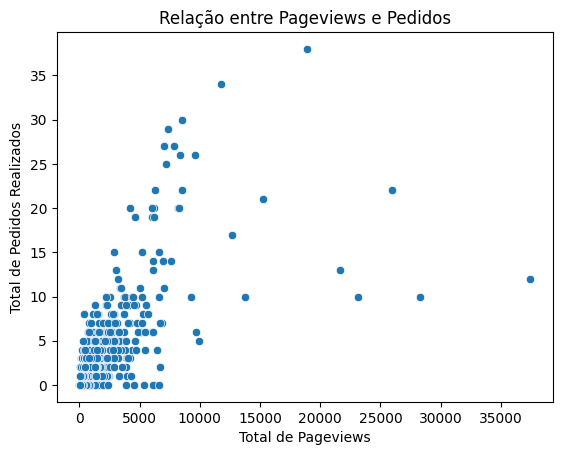

                     visitors  sessions  total_bounce_rate  total_carts  \
visitors             1.000000  0.998448           0.081072     0.889454   
sessions             0.998448  1.000000           0.085091     0.885577   
total_bounce_rate    0.081072  0.085091           1.000000     0.039384   
total_carts          0.889454  0.885577           0.039384     1.000000   
total_checkouts      0.604452  0.619182          -0.098627     0.631005   
total_conversion    -0.038768 -0.039829          -0.215354    -0.032533   
total_orders_placed  0.517097  0.533676          -0.089548     0.522349   
total_pageviews      0.956084  0.962027           0.018972     0.874363   

                     total_checkouts  total_conversion  total_orders_placed  \
visitors                    0.604452         -0.038768             0.517097   
sessions                    0.619182         -0.039829             0.533676   
total_bounce_rate          -0.098627         -0.215354            -0.089548   
total_ca

<ipython-input-37-1a33c47eff99>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
descritivos = data.describe()
print(descritivos)

# Cria um scatter plot para visualizar a relação entre as variáveis
sns.scatterplot(x='total_pageviews', y='total_orders_placed', data=data)
plt.title('Relação entre Pageviews e Pedidos')
plt.xlabel('Total de Pageviews')
plt.ylabel('Total de Pedidos Realizados')
plt.show()

# Calcula a matriz de correlação para identificar relações entre variáveis
matriz_correlacao = data.corr()
print(matriz_correlacao)



In [ ]:
# Visitantes e Sessões: Correlação quase perfeita (0.998), o que é esperado, já que mais visitantes geralmente resultam em mais sessões.
# Visitantes e Total de Carrinhos: Correlação forte (0.889), sugerindo que mais visitantes estão associados a mais carrinhos de compras criados.
# Total de Pageviews e Total de Pedidos Realizados: Correlação moderada (0.517), indicando que há uma relação positiva
#  entre o número de visualizações de página e o número de pedidos.
# Total de Checkouts e Visitantes: Correlação moderada (0.604), sugerindo que mais visitantes podem levar a mais checkouts.

## MAPA DE CALOR PARA CORRELAÇÃO (HEATMAP)

<ipython-input-11-e5555a103ca9>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



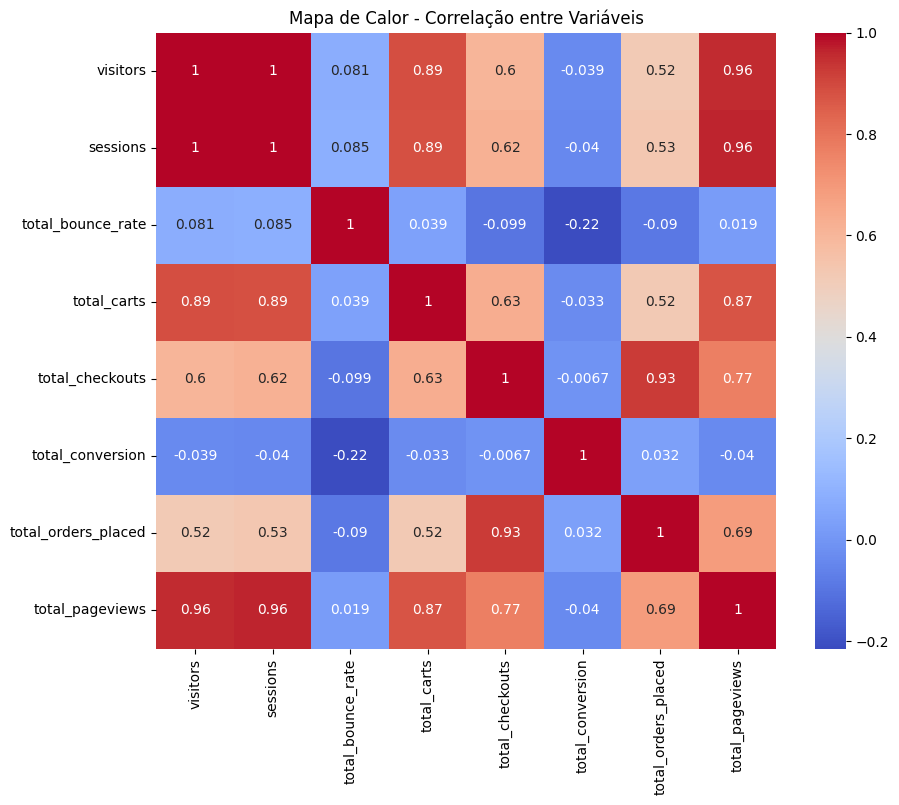

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

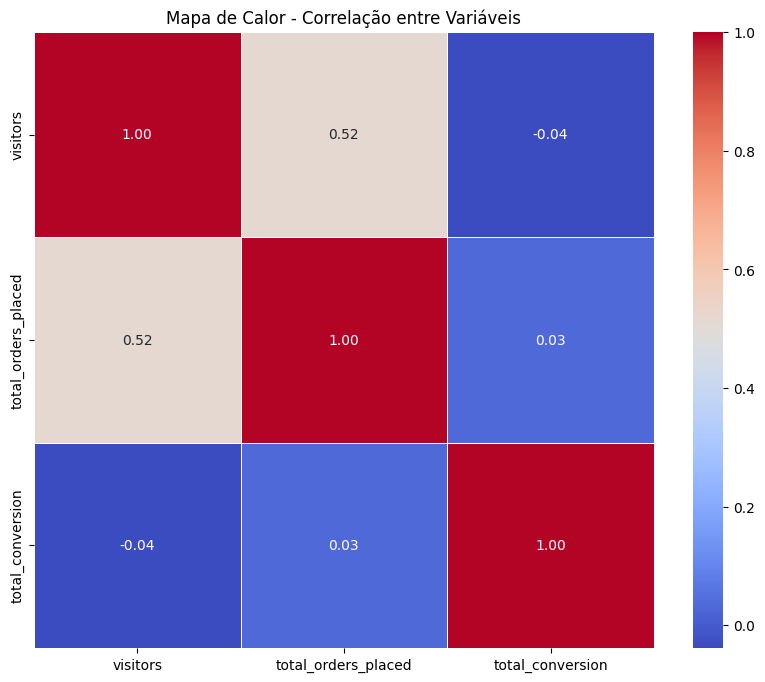

In [ ]:
# Selecionando as colunas relevantes para a análise de correlação
colunas_selecionadas = ['visitors', 'total_orders_placed', 'total_conversion']

# Criando um DataFrame apenas com as colunas selecionadas
dados_correlacao = data[colunas_selecionadas]

# Calculando a matriz de correlação
matriz_correlacao = dados_correlacao.corr()

# Criando um mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis')
plt.show()

In [ ]:
# Visitantes e Total de Pedidos Realizados: A correlação de 0.52 indica uma relação positiva moderada.
# Isso sugere que, à medida que o número de visitantes aumenta, o total de pedidos realizados também tende a aumentar, mas não em uma relação um para um.

# Visitantes e Taxa de Conversão Total: A correlação de -0.04 sugere que não há uma relação linear significativa
# entre o número de visitantes e a taxa de conversão total. O número de visitantes não parece afetar diretamente a probabilidade de conversão em vendas.

# Total de Pedidos Realizados e Taxa de Conversão Total: A correlação de 0.03 é novamente muito baixa,
#  indicando que não há uma relação linear significativa entre os pedidos realizados e a taxa de conversão.

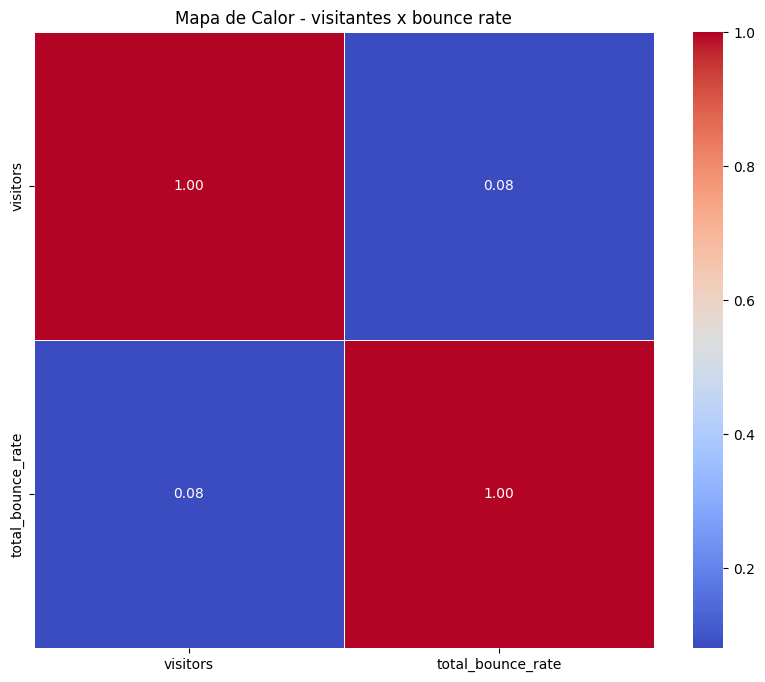

In [ ]:
# Selecionando as colunas relevantes para a análise de correlação
colunas_selecionadas = ['visitors', 'total_bounce_rate']

# Criando um DataFrame apenas com as colunas selecionadas
dados_correlacao = data[colunas_selecionadas]

# Calculando a matriz de correlação
matriz_correlacao = dados_correlacao.corr()

# Criando um mapa de calor usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - visitantes x bounce rate')
plt.show()

<ipython-input-49-b5ab62b70de8>:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



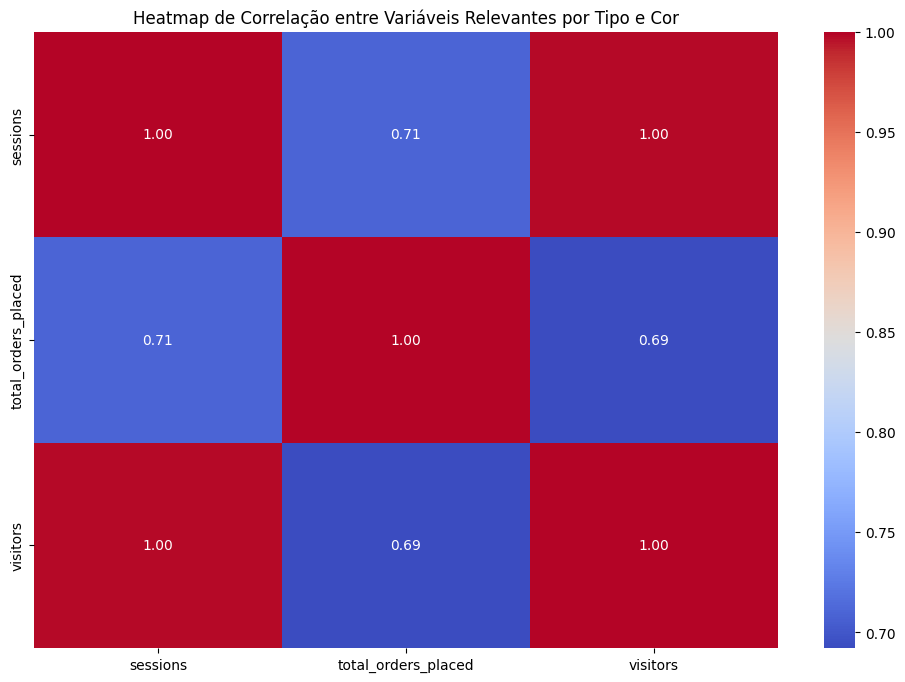

In [ ]:
data[['type', 'color']] = data['Cloth_type_color'].str.split('-', 1, expand=True)

# Selecionar variáveis relevantes para a análise
variaveis_relevantes = data[['visitors', 'sessions', 'total_orders_placed']]

# Criar uma tabela pivot para agregar dados por 'type' e 'color' e calcular a média
pivot_table = pd.pivot_table(data, values=variaveis_relevantes.columns, index=['type', 'color'], aggfunc=np.mean)

# Criar o heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis Relevantes por Tipo e Cor')
plt.show()

# O heatmap de correlação é gerado para visualizar como as variáveis 'visitors', 'sessions' e 'total_orders_placed' se relacionam entre si para cada tipo e cor de roupa.
#  Isso pode ajudar na identificação de padrões e na tomada de decisões estratégicas, por exemplo:
# Identificar Tendências por Tipo e Cor: Se houver uma forte correlação positiva entre 'visitors' e 'total_orders_placed' para um tipo ou cor específicos,
#  isso pode indicar uma preferência dos clientes por esses produtos.
# Personalização da Estratégia de Marketing: Compreender como diferentes tipos e cores de roupas estão relacionados ao comportamento dos visitantes e
#  às conversões pode permitir uma personalização mais eficaz das estratégias de marketing.
# Gestão de Estoque e Produção: Caso certos tipos e cores de roupas estejam fortemente correlacionados com o aumento nas sessões ou conversões,
# a empresa pode ajustar estratégias de estoque e produção para atender à demanda específica.
# Este é apenas um exemplo, e as decisões estratégicas podem variar com base na natureza específica dos seus dados e nos objetivos do seu ecommerce.

In [ ]:
# Sessões e Total de Pedidos Realizados: A correlação de 0.71 sugere uma relação positiva forte entre o número de sessões
# e o número total de pedidos realizados. Isso significa que, conforme o número de sessões aumenta, o número total de pedidos realizados também tende a aumentar.

# Sessões e Visitantes: A correlação de 1.00 é uma correlação perfeita, o que é esperado, pois mais visitantes geralmente significam mais sessões.

# Total de Pedidos Realizados e Visitantes: A correlação de 0.69 também indica uma relação positiva, significando que quando o número de visitantes aumenta,
# o número de pedidos realizados tende a aumentar também, embora a relação não seja tão forte quanto a relação entre sessões e pedidos realizados.

# NORMAL PADRÃO

In [ ]:
colunas_normalizar = ['total_pageviews', 'total_orders_placed']
data_normalizado = data[colunas_normalizar].copy()
scaler = StandardScaler()
data_normalizado[colunas_normalizar] = scaler.fit_transform(data_normalizado)

print(data_normalizado)

      total_pageviews  total_orders_placed
0            1.670939             1.044109
1           -0.010846             0.016790
2           -0.403728            -0.496869
3           -0.037586            -0.496869
4           -0.234645            -0.496869
...               ...                  ...
1234        -0.341196            -0.496869
1235        -0.409899            -0.496869
1236        -0.411956            -0.496869
1237        -0.425121            -0.496869
1238        -0.426355            -0.496869

[1239 rows x 2 columns]


                     visitors  total_bounce_rate  total_orders_placed
visitors             1.000000           0.081072             0.517097
total_bounce_rate    0.081072           1.000000            -0.089548
total_orders_placed  0.517097          -0.089548             1.000000



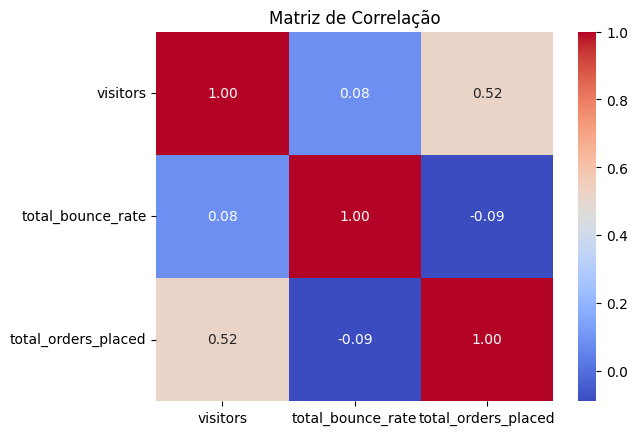

In [ ]:
# Selecionar variáveis relevantes para a análise
variaveis_relevantes = data[['visitors', 'total_bounce_rate', 'total_orders_placed']]

# Calcular matriz de correlação
correlacao = variaveis_relevantes.corr()

# Visualizar a matriz de correlação
print(correlacao)

print()
#No heatmap mostramos uma forma de melhor visualizar os resultados
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# DISTRIBUIÇÕES AMOSTRAIS

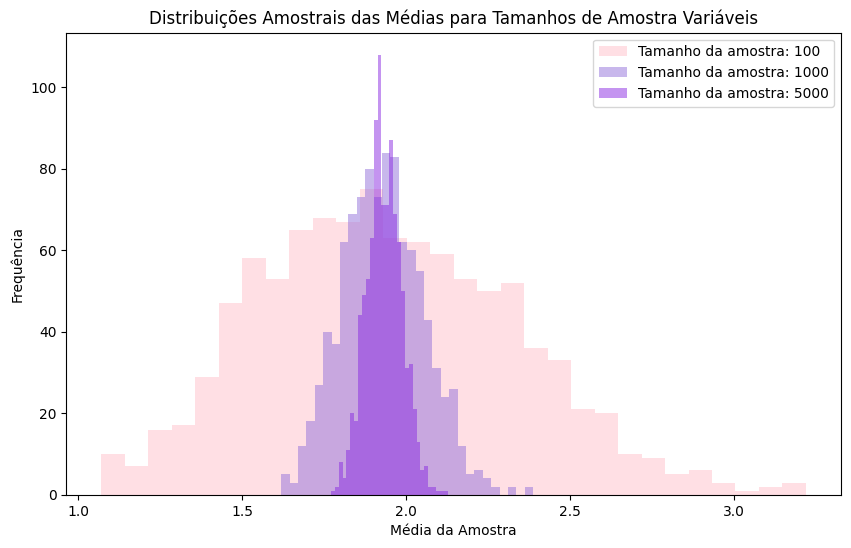

In [ ]:
event_column = 'total_orders_placed'
population_sizes = [100, 1000, 5000]

sample_means = []

for size in population_sizes:
    means = []
    for _ in range(1000):
        sample = data[event_column].sample(size, replace=True)
        means.append(sample.mean())
    sample_means.append(means)

plt.figure(figsize=(10, 6))

colors = ['#FFC0CB', '#9370DB', '#8A2BE2']

for i, means in enumerate(sample_means):
    plt.hist(means, bins=30, alpha=0.5, label=f'Tamanho da amostra: {population_sizes[i]}', color=colors[i])

plt.title('Distribuições Amostrais das Médias para Tamanhos de Amostra Variáveis')
plt.xlabel('Média da Amostra')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# INTERVALO DE CONFIANÇA

In [ ]:
import numpy as np
from scipy import stats

np.random.seed(42)
tempos_de_entrega = np.random.normal(loc=3, scale=1, size=100)

media_amostra = np.mean(tempos_de_entrega)
desvio_padrao_amostra = np.std(tempos_de_entrega, ddof=1)

tamanho_amostra = len(tempos_de_entrega)

nivel_confianca_90 = 0.9
nivel_confianca_95 = 0.95

intervalo_confianca_90 = stats.t.interval(nivel_confianca_90, tamanho_amostra - 1, loc=media_amostra, scale=desvio_padrao_amostra / np.sqrt(tamanho_amostra))
intervalo_confianca_95 = stats.t.interval(nivel_confianca_95, tamanho_amostra - 1, loc=media_amostra, scale=desvio_padrao_amostra / np.sqrt(tamanho_amostra))

print(f"Intervalo de Confiança de 90% para a Média: {intervalo_confianca_90}")
print(f"Intervalo de Confiança de 95% para a Média: {intervalo_confianca_95}")


Intervalo de Confiança de 90% para a Média: (2.7453620000039756, 3.046944965207835)
Intervalo de Confiança de 95% para a Média: (2.7159531636380985, 3.0763538015737124)


Intervalo de Confiança para a Média de 'total_orders_placed': (1.7175208394539172, 2.1517285552192065)


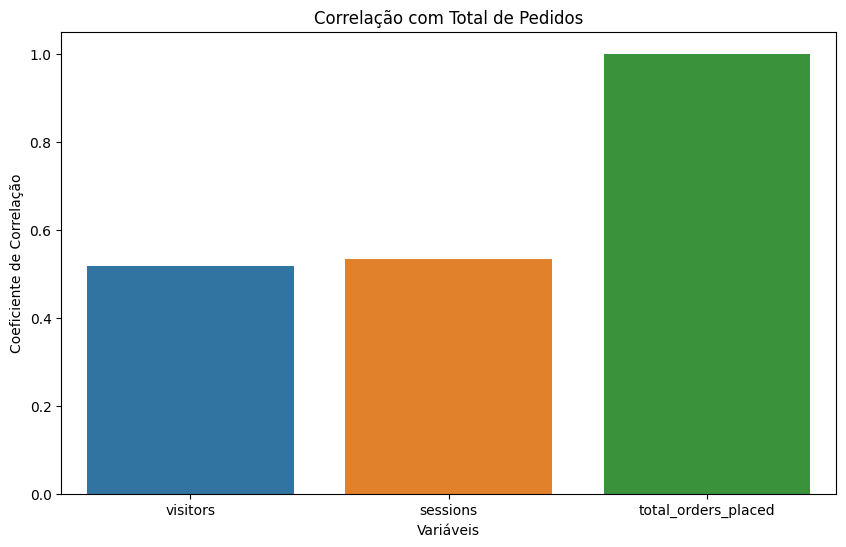

In [ ]:
confianca = 0.95
total_orders_mean = data['total_orders_placed'].mean()
total_orders_std = data['total_orders_placed'].std()
tamanho_amostra = len(data['total_orders_placed'])

# Calcular o erro padrão da média
erro_padrao = total_orders_std / np.sqrt(tamanho_amostra)

# Calcular o intervalo de confiança
intervalo_confianca = stats.t.interval(confianca, tamanho_amostra - 1, loc=total_orders_mean, scale=erro_padrao)

print(f"Intervalo de Confiança para a Média de 'total_orders_placed': {intervalo_confianca}")

# Correlação entre variáveis relevantes
variaveis_relevantes = data[['visitors', 'sessions', 'total_orders_placed']]
correlacao = variaveis_relevantes.corr()

# Visualizar a matriz de correlação com gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlacao.index, y=correlacao['total_orders_placed'])
plt.title('Correlação com Total de Pedidos')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente de Correlação')
plt.show()
# Explicação e Tomada de Decisão
# - O intervalo de confiança para a média de 'total_orders_placed' fornece uma faixa estimada onde a verdadeira média pode estar com uma certa confiança.
# - A matriz de correlação ajuda a entender como as variáveis 'visitors', 'sessions' e 'total_orders_placed' estão relacionadas entre si.
# - Se houver uma correlação forte e positiva entVisitantes e Total de Pedidos Realizados: A correlação de 0.52 indica uma relação positiva moderada.
# Isso sugere que, à medida que o número de visitantes aumenta, o total de pedidos realizados também tende a aumentar, mas não em uma relação um para um.

# Visitantes e Taxa de Conversão Total: A correlação de -0.04 sugere que não há uma relação linear significativa entre o número de visitantes e a taxa de conversão total.
#  O número de visitantes não parece afetar diretamente a probabilidade de conversão em vendas.

# Total de Pedidos Realizados e Taxa de Conversão Total: A correlação de 0.03 é novamente muito baixa,
# indicando que não há uma relação linear significativa entre os pedidos realizados e a taxa de conversão.re 'visitors' e 'total_orders_placed',
#  por exemplo, pode ser estratégico focar em atrair mais visitantes para aumentar as ordens.

# Lembre-se de adaptar os nomes das colunas e os parâmetros conforme necessário para seus dados específicos.